# Spectral Analysis Experiments

Alexandre R.J. Francois

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from noFFT_python import resonate_python
from noFFT_utils import log_frequencies, frequency_response



## Resonator dynamics

In [3]:
# Geometrically spaced frequencies (log frequency scale)
fmin: float = 32.70
n_freqs: int = 112
freqs_per_octave: int = 12
frequencies = log_frequencies(fmin=fmin, n_freqs=n_freqs, freqs_per_octave=freqs_per_octave)

# print(frequencies)


### Without smoothing

3.0 0.0030004340774793187 0.0075289994883608324


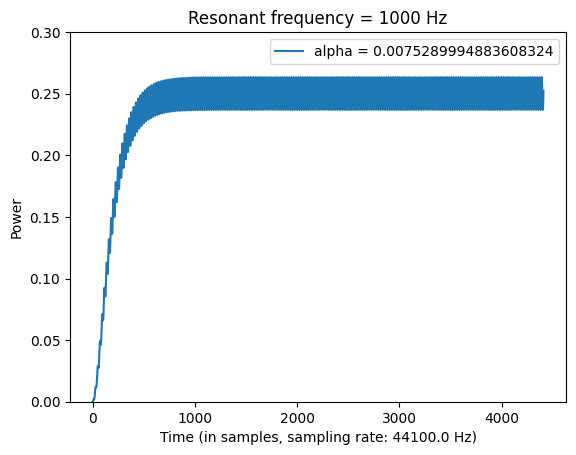

<Figure size 2400x1800 with 0 Axes>

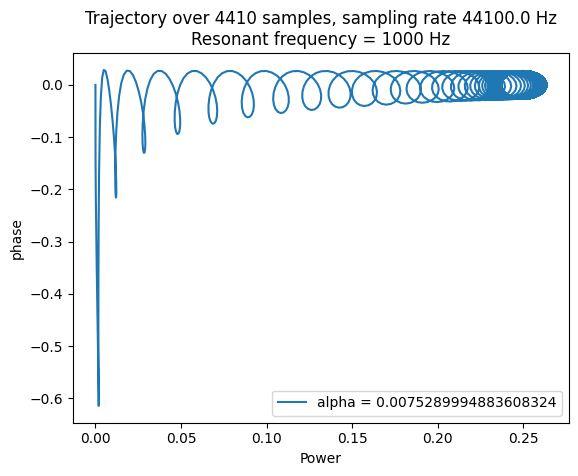

<Figure size 2400x1800 with 0 Axes>

/var/folders/8j/30kp84v95fj3swjq__w4q6580000gn/T/ipykernel_45562/1935457504.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outputs[idx] = r[-1]


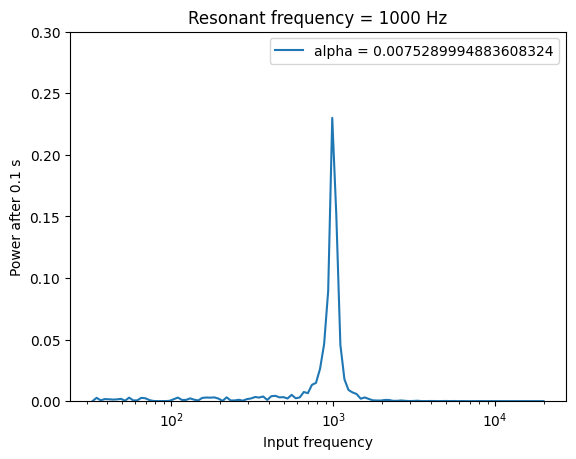

<Figure size 2400x1800 with 0 Axes>

In [4]:
sampling_rate = 44100.0 # in Hz
duration = 0.1 # in s
numpoints = int(sampling_rate*duration)

frequency = 1000
ifreq = frequency
rfreqs = np.array([frequency])

# heuristic for alpha as a function of frequency and sampling rate
# relate alpha to the number of samples per cycle
sample_duration = 1.0 / sampling_rate
samples_per_cycle = sampling_rate / frequency
cycle_duration = 1.0 / frequency


k = np.log10(1+frequency)
tau = k * cycle_duration
alpha = 1 - np.exp(- sample_duration / tau)

print(np.log10(frequency), tau, alpha)


# # Same frequency and phase, no smoothing (beta = 1)
# raw_output = resonate(ifreq=ifreq, rfreqs=rfreqs, alphas=np.array([alpha]), betas=np.array([1]), duration=duration, numpoints=numpoints)
# plt.plot(raw_output, label=f"alpha={alpha}, no smoothing")

# No smoothing
alphas = np.array([alpha])
betas = np.ones_like(alphas) # no smoothing
unsmoothed_output, _ = resonate_python(ifreq=ifreq, rfreqs=rfreqs, alphas=alphas, betas=betas, sr=sampling_rate, duration=duration)

# plt.plot(smoothed_output, label=f"alpha = beta={betas[0]}")
plt.plot(unsmoothed_output, label=f"alpha = {alphas[0]}")

plt.xlabel(f"Time (in samples, sampling rate: {sampling_rate} Hz)")
plt.ylabel("Power")
plt.title(f"Resonant frequency = {frequency} Hz")
plt.legend()

plt.ylim(0, 0.3)

plt.figure(figsize=(8, 6), dpi=300)
plt.show()



##############

powers, angles = resonate_python(ifreq=ifreq, rfreqs=rfreqs, alphas=alphas, betas=betas, sr=sampling_rate, duration=duration)

plt.plot(powers, angles, label=f"alpha = {alphas[0]}")

plt.xlabel("Power")
plt.ylabel("phase")
plt.title(f"Trajectory over {numpoints} samples, sampling rate {sampling_rate} Hz\nResonant frequency = {frequency} Hz")
plt.legend()

plt.figure(figsize=(8, 6), dpi=300)
plt.show()


###############


outputs = np.zeros((frequencies.shape[0]))
for idx, ifreq in enumerate(frequencies):
  r, _ = resonate_python(ifreq=ifreq, rfreqs=rfreqs, alphas=alphas, betas=betas, sr=sampling_rate, duration=duration)
  outputs[idx] = r[-1]
 
# plt.plot(frequencies, outputs, label=f"alpha = beta = {betas[0]}")
plt.plot(frequencies, outputs, label=f"alpha = {alphas[0]}")

plt.xlabel("Input frequency")
plt.ylabel(f"Power after {duration} s")
plt.title(f"Resonant frequency = {frequency} Hz")
plt.legend()

plt.xscale('log')
plt.ylim(0, 0.3)

plt.figure(figsize=(8, 6), dpi=300)
plt.show()




### With smoothing

3.0 0.0029901678776507977 0.00755475105494785
(4410, 1)


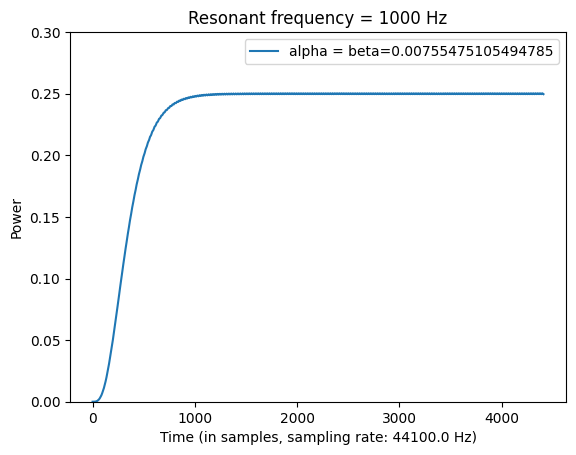

<Figure size 2400x1800 with 0 Axes>

/var/folders/8j/30kp84v95fj3swjq__w4q6580000gn/T/ipykernel_45562/1933490635.py:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  outputs[idx] = r[-1]


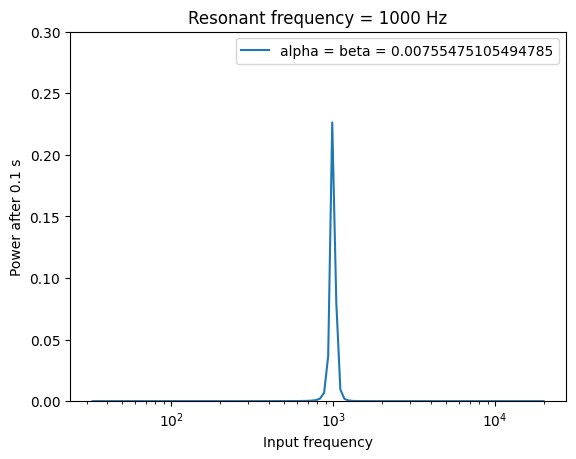

<Figure size 2400x1800 with 0 Axes>

In [5]:
sampling_rate = 44100.0 # in Hz
duration = 0.1 # in s
numpoints = int(sampling_rate*duration)

frequency = 1000
ifreq = frequency
rfreqs = np.array([frequency])

# heuristic for alpha as a function of frequency and sampling rate
# relate alpha to the number of samples per cycle
sample_duration = 1.0 / sampling_rate
samples_per_cycle = sampling_rate / frequency
cycle_duration = 1.0 / frequency

# k = np.log10(1+frequency)
k = 0.3 * np.log2(1+frequency)
tau = k * cycle_duration
alpha = 1 - np.exp(- sample_duration / tau)

print(np.log10(frequency), tau, alpha)

# With smoothing, beta = alpha
alphas = np.array([alpha])
betas = np.array([alpha])
# smoothed_output = resonate_python(ifreq=ifreq, rfreqs=rfreqs, alphas=alphas, betas=betas, duration=duration, numpoints=numpoints)
smoothed_output = frequency_response(ifreq=ifreq, rfreqs=rfreqs, alphas=alphas, sr=sampling_rate, duration=duration)
print(smoothed_output.shape)

plt.plot(smoothed_output, label=f"alpha = beta={betas[0]}")
plt.xlabel(f"Time (in samples, sampling rate: {sampling_rate} Hz)")
plt.ylabel("Power")
plt.title(f"Resonant frequency = {frequency} Hz")
plt.legend()

plt.ylim(0, 0.3)

plt.figure(figsize=(8, 6), dpi=300)
plt.show()

##############

outputs = np.zeros((frequencies.shape[0]))
for idx, ifreq in enumerate(frequencies):
  r = frequency_response(ifreq=ifreq, rfreqs=rfreqs, alphas=alphas, sr=sampling_rate, duration=duration)
  outputs[idx] = r[-1]
 
plt.plot(frequencies, outputs, label=f"alpha = beta = {betas[0]}")

plt.xlabel("Input frequency")
plt.ylabel(f"Power after {duration} s")
plt.title(f"Resonant frequency = {frequency} Hz")
plt.legend()

plt.xscale('log')
plt.ylim(0, 0.3)

plt.figure(figsize=(8, 6), dpi=300)
plt.show()




# Time constant

In [6]:
# utilities to go between time constant and alpha

def tau_from_alpha(alpha, sr):
  return -1.0 / (np.log(1 - alpha) * sr)

def tau_from_alpha_approx(alpha, sr):
  return 1.0 / (alpha * sr)


def alpha_from_tau(tau, sr):
  return 1.0 - np.exp(-1.0 / (tau * sr))

def alpha_from_tau_approx(tau, sr):
  return 1.0 / (tau * sr)


In [7]:
from noFFT_utils import alphas_heuristic

# Heuristic to link alpha to frequency sampling rate
def alpha_heuristic(frequency, sr):
  return 1 - np.exp(- frequency / (sr * np.log10(1+frequency)))

# def alphas_heuristic(frequencies, sr, k = 1):
#   return 1 - np.exp(- (1/sr) * frequencies / (k * np.log10(1+frequencies)))

def tau_heuristic(frequency, sr):
  return tau_from_alpha(alpha_heuristic(frequency), sr)


# Time constant and sampling rate

439.95700446074346
0.0037655303703122422


/var/folders/8j/30kp84v95fj3swjq__w4q6580000gn/T/ipykernel_45562/2466778899.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


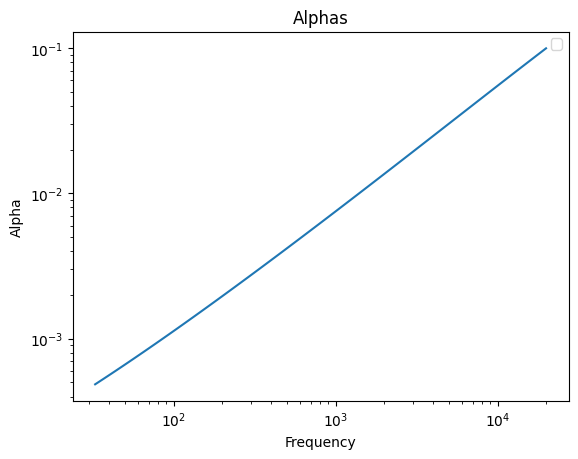

In [8]:
sr = 44100
alphas = alphas_heuristic(frequencies=frequencies, sr=sr, k=1)

print(frequencies[45])
print(alphas[45])

plt.plot(frequencies, alphas)

plt.xlabel("Frequency")
plt.ylabel("Alpha")
plt.title("Alphas")
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.show()


# Response across frequencies

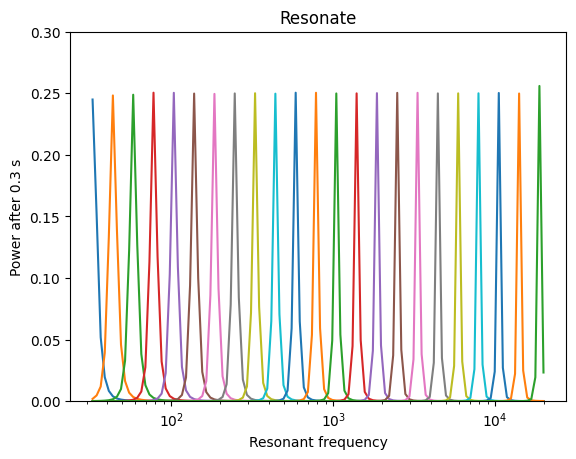

<Figure size 2400x1800 with 0 Axes>

In [9]:
# Whole bank, various input frequencies
sampling_rate = 44100.0
duration = 0.3
numpoints = int(sampling_rate*duration)

ifreqs = frequencies[0::5]

nb_plots = ifreqs.shape[0]
nb_frequencies = frequencies.shape[0]

alphas = alphas_heuristic(frequencies=frequencies, sr=sampling_rate, k=1)

for idx, ifreq in enumerate(ifreqs):
  r = frequency_response(ifreq=ifreq, rfreqs=frequencies, alphas=alphas, sr=sampling_rate, duration=duration, output_type='powers')
  plt.plot(frequencies, r[-1], label="ifreq=" + str(ifreqs[idx]))

plt.xlabel("Resonant frequency")
plt.ylabel(f"Power after {duration} s")
plt.title("Resonate")
# plt.legend()

plt.xscale('log')
plt.ylim(0, 0.3)

plt.figure(figsize=(8, 6), dpi=300)

plt.show()


# Equalization

(112,)


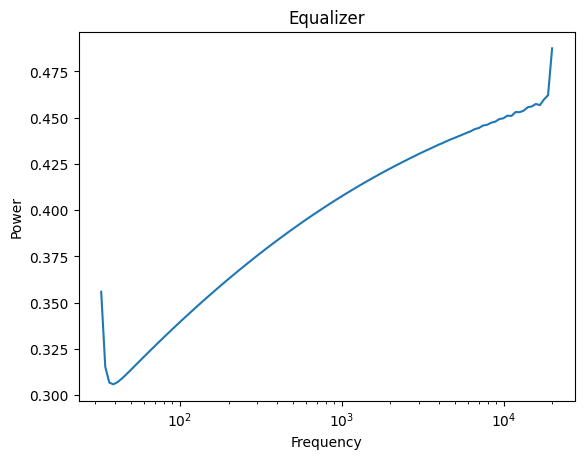

<Figure size 2400x1800 with 0 Axes>

In [10]:
# Equalizer
from noFFT_utils import frequency_sweep

# # Whole bank frequency sweep, areas for all frequencies
# sampling_rate = 44100.0
# duration = 0.3
# alphas = alphas_heuristic(freqs=frequencies, sr=sampling_rate)

eq = frequency_sweep(frequencies, alphas, sr=sampling_rate)
print(eq.shape)

plt.plot(frequencies, eq)
# plt.plot(frequencies, eq / np.max(eq))
# plt.plot(frequencies, np.sqrt(eq))

plt.xlabel("Frequency")
plt.ylabel(f"Power")
plt.title("Equalizer")
# plt.legend()

plt.xscale('log')
# plt.ylim(0, 1.0)

plt.figure(figsize=(8, 6), dpi=300)

plt.show()
